https://www.kaggle.com/datasets/camnugent/california-housing-prices

In [ ]:
# Importing the libraries
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = '/content/drive/MyDrive/MachineLearning_PANDAS/AulaIntro/housing.csv'

data = pd.read_csv(file_path)

print(data.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


Sobre o dataset

1. **longitude**: Medida de quão a oeste a casa está

2. **latitude**: Medida de quão a oeste a casa está

3. **housingMedianAge**: Idade média de uma casa dentro de um quarteirão

4. **totalRooms**: Número total de cômodos por quarteirão

5. **totalBedrooms**: Número total de quartos por quarteirão

6. **population**: Número total de pessoas que residem em um quarteirão

7. **households**: Número total de domicílios, um grupo de pessoas que residem em uma unidade domiciliar, por um quarteirão

8. **medianIncome**: Renda média das famílias dentro de um bloco de casas (medido em dezenas de milhares de dólares americanos)

9. **medianHouseValue**: Valor médio da casa para famílias dentro de um quarteirão (medido em dólares americanos)

10. **oceanProximity**: Localização da casa com referência ao oceano/mar

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [ ]:
data.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [ ]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
data.ocean_proximity.unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

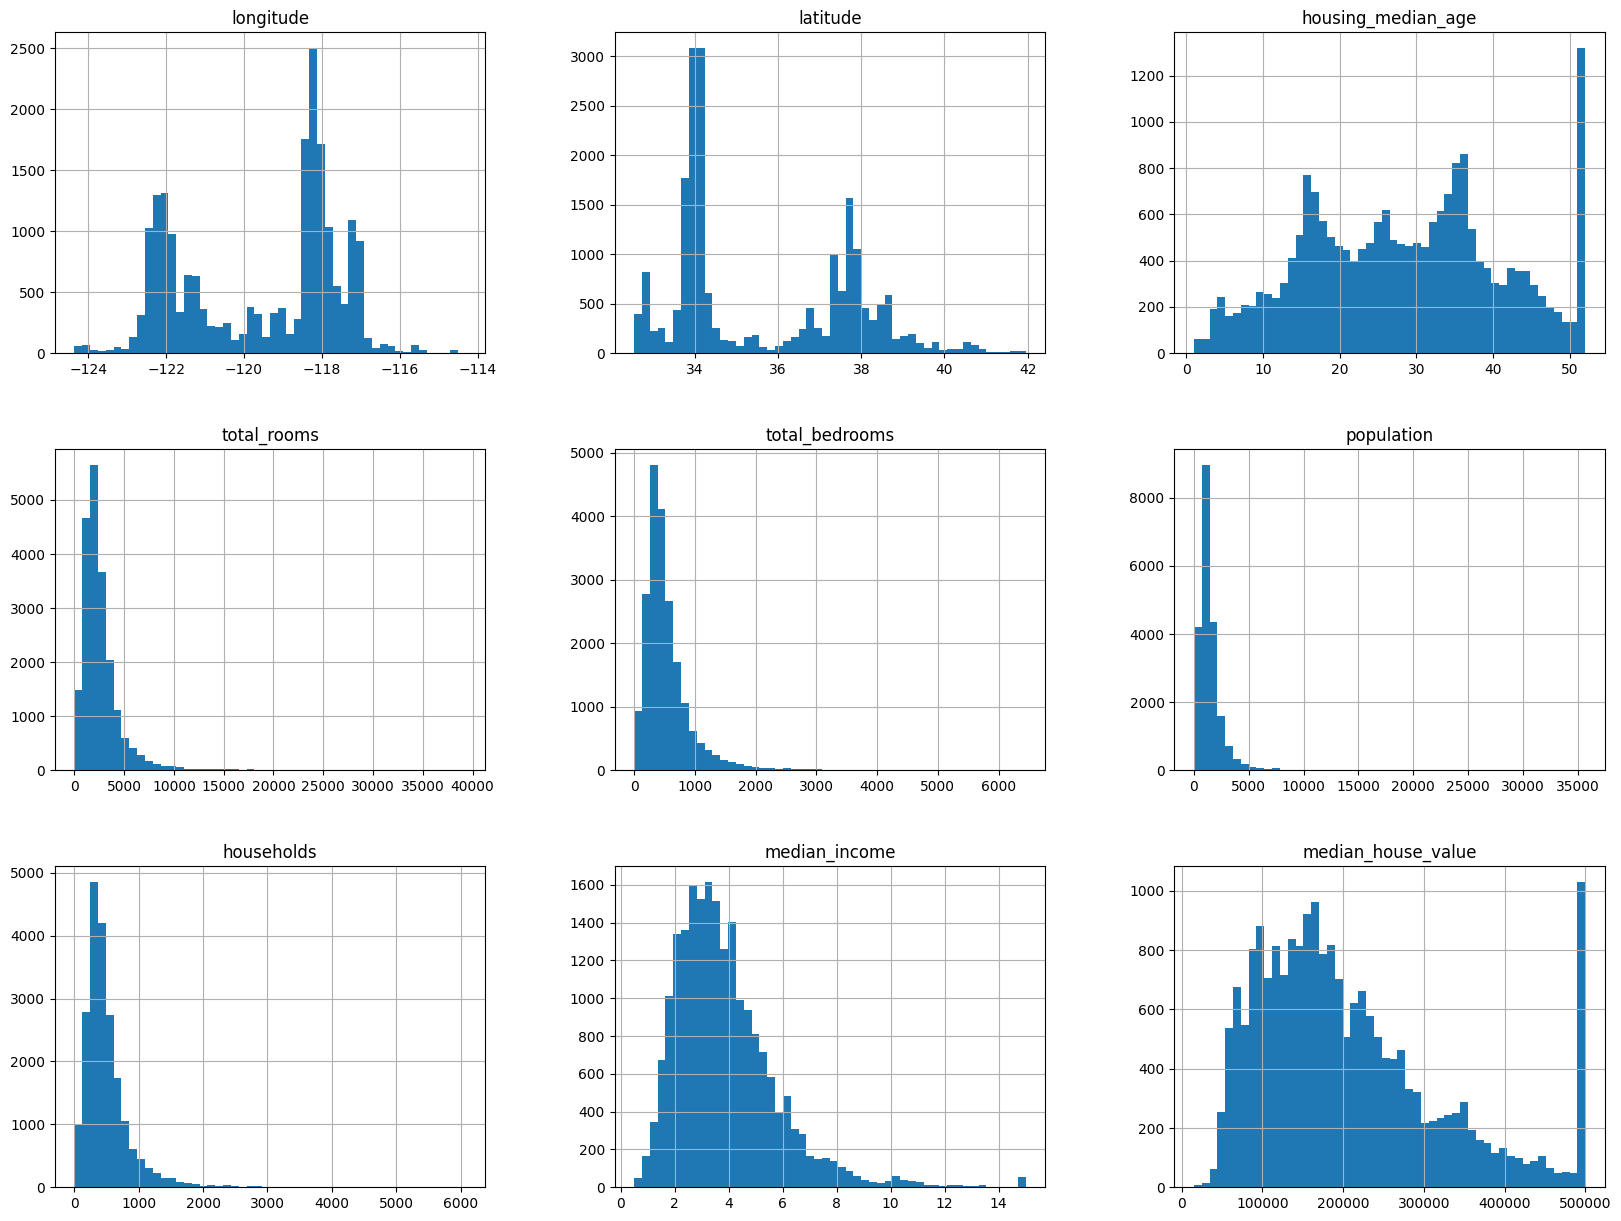

In [ ]:
data.hist(bins = 50, figsize= (20, 15))
plt.show()

<Axes: >

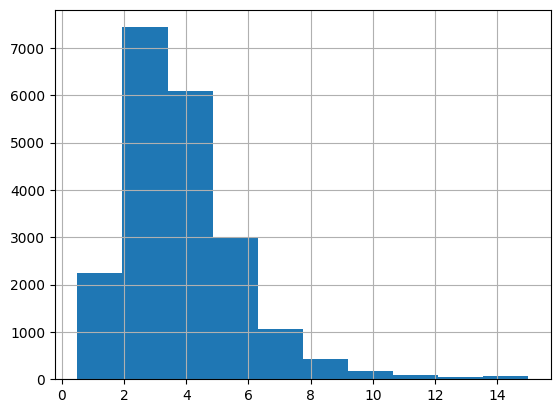

In [ ]:
#introduziremos uma nova coluna para categorizar os dados de acordo com a "median_income"
data['median_income'].hist()

<Axes: >

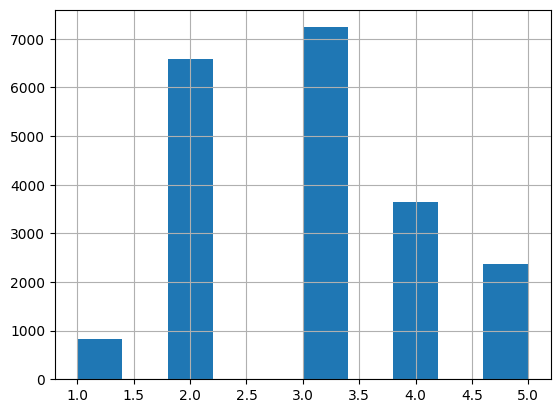

In [ ]:
data['income_cat'] = pd.cut(data['median_income'], bins=[0., 1.5, 3.0, 4.5, 6., np.inf], labels=[1,2,3,4,5])
data['income_cat'].hist()

In [ ]:
data.income_cat.value_counts()/len(data)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

#Test Set

In [ ]:
from sklearn.model_selection import train_test_split
train_set,test_set = train_test_split(data, test_size=0.3, random_state=42)
len(train_set)

14448

In [ ]:
len(test_set)

6192

In [ ]:
#Amostra estratificada
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 2, test_size=0.2, random_state=42)

for train_index, test_index in split.split(data, data["income_cat"]):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]

In [ ]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 13027 to 3909
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   longitude           16512 non-null  float64 
 1   latitude            16512 non-null  float64 
 2   housing_median_age  16512 non-null  float64 
 3   total_rooms         16512 non-null  float64 
 4   total_bedrooms      16348 non-null  float64 
 5   population          16512 non-null  float64 
 6   households          16512 non-null  float64 
 7   median_income       16512 non-null  float64 
 8   median_house_value  16512 non-null  float64 
 9   ocean_proximity     16512 non-null  object  
 10  income_cat          16512 non-null  category
dtypes: category(1), float64(9), object(1)
memory usage: 1.4+ MB


In [ ]:
strat_test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4128 entries, 12161 to 956
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   longitude           4128 non-null   float64 
 1   latitude            4128 non-null   float64 
 2   housing_median_age  4128 non-null   float64 
 3   total_rooms         4128 non-null   float64 
 4   total_bedrooms      4085 non-null   float64 
 5   population          4128 non-null   float64 
 6   households          4128 non-null   float64 
 7   median_income       4128 non-null   float64 
 8   median_house_value  4128 non-null   float64 
 9   ocean_proximity     4128 non-null   object  
 10  income_cat          4128 non-null   category
dtypes: category(1), float64(9), object(1)
memory usage: 359.0+ KB


In [ ]:
data = strat_train_set.copy()

<Axes: xlabel='longitude', ylabel='latitude'>

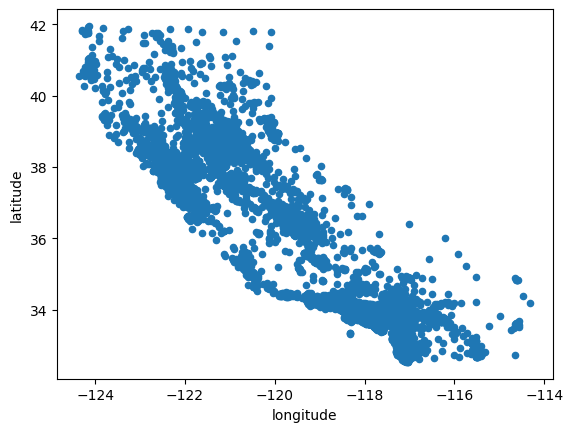

In [ ]:
data.plot(kind="scatter",x="longitude", y="latitude")

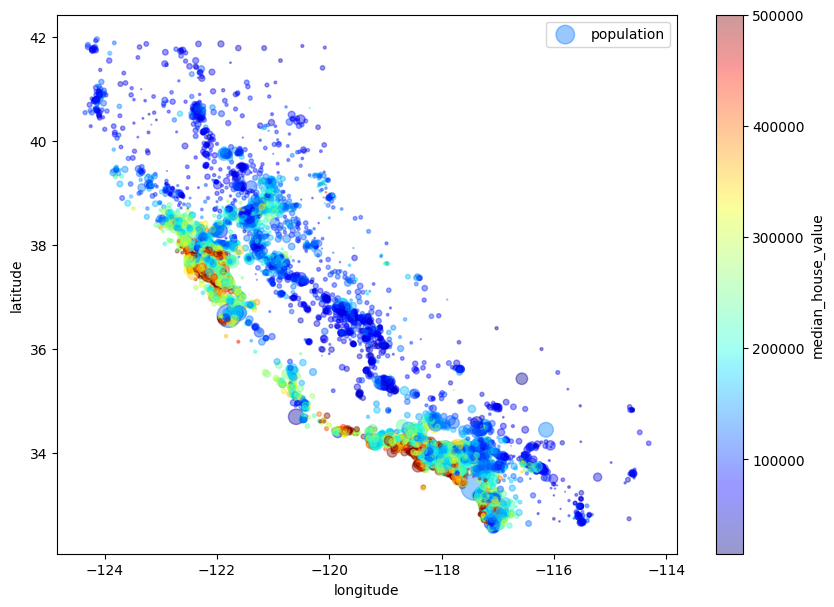

In [ ]:
# analisando o gráfico, percebemos que possuimos padrões, e podemos usar
# algoritmos de cluster (usados p/ agrupar pontos similares de dados)
data.plot(
    kind='scatter',
    x='longitude',
    y='latitude',
    alpha=0.4,
    s=data['population']/100,
    label='population',
    figsize=(10, 7),
    c='median_house_value',
    cmap=plt.get_cmap('jet'),
    colorbar=True,
)

plt.legend()

In [ ]:
# dropar "ocean_proximity" pq só vai atrapalhar nas contas
data_num = data.drop("ocean_proximity", axis=1)
# verificaremos a correlação entre o valor médio das casas
corr_matrix = data_num.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.686979
total_rooms           0.139821
housing_median_age    0.098470
households            0.069620
total_bedrooms        0.054386
population           -0.021894
longitude            -0.043389
latitude             -0.144899
Name: median_house_value, dtype: float64

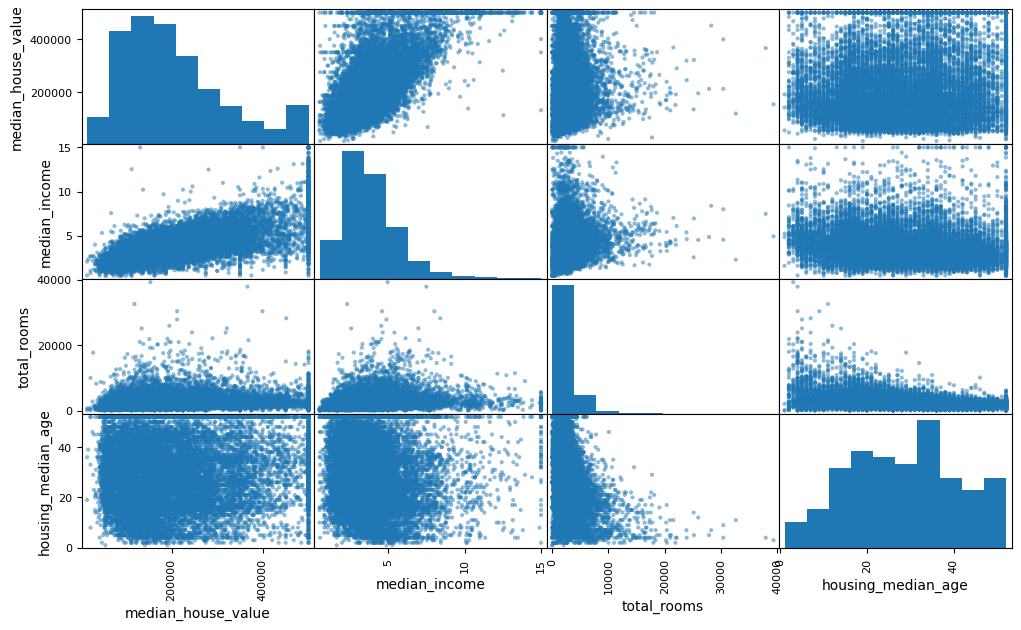

In [ ]:
from pandas.plotting import scatter_matrix

# matriz de correlação entre atributos com correlação
attributes = ['median_house_value', 'median_income','total_rooms','housing_median_age']
scatter_matrix(data[attributes], figsize=(12, 7))
plt.show()

<Axes: xlabel='median_income', ylabel='median_house_value'>

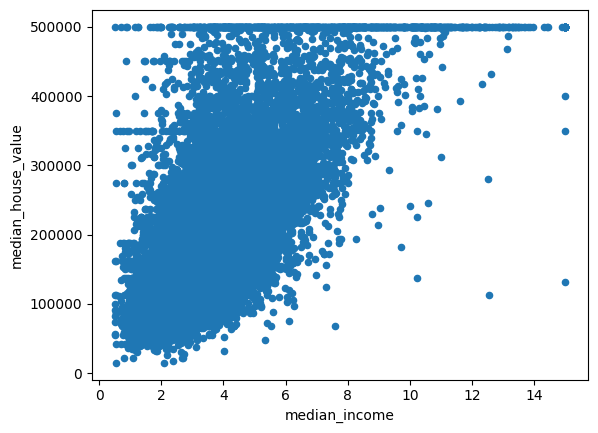

In [ ]:
# zoom na correlação entre target e median_income
data.plot(kind="scatter",x="median_income",y="median_house_value")

#Limpeza dos dados

In [ ]:
data_num.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        164
population              0
households              0
median_income           0
median_house_value      0
income_cat              0
dtype: int64

Por termos valores faltantes, utilizaremos a substituição dos mesmos pelo valor mediano

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy="median")
imputer.fit(data_num)

X = imputer.transform(data_num)
data_tr = pd.DataFrame(X,columns = data_num.columns)

In [ ]:
data_tr.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
income_cat            0
dtype: int64

# Regressão Linear

Separando os targets e predictors

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X = data_tr.drop("median_house_value", axis=1)  # Features (input)
y = data_tr["median_house_value"]              # Target variable (output)

# Separando os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criando e treinando o modelo de regressão linear
model = LinearRegression()
model.fit(X_train, y_train)

# Predições no Test Set
y_pred = model.predict(X_test)

# Validando o modelo
r2 = r2_score(y_test, y_pred)

print("R-squared (R2):", r2)

R-squared (R2): 0.6466332151094616


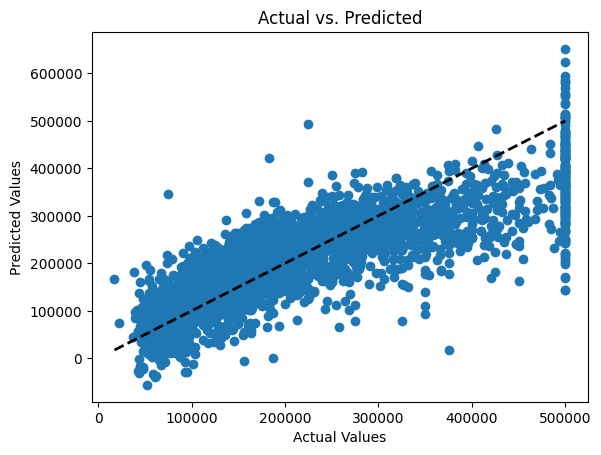

In [ ]:
import matplotlib.pyplot as plt

# Plotando actual vs. predicted values
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Create and Train the Random Forest Regression Model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Make Predictions on the Test Set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Model
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Regression - R-squared (R2):", r2_rf)

Random Forest Regression - R-squared (R2): 0.8177402080943681


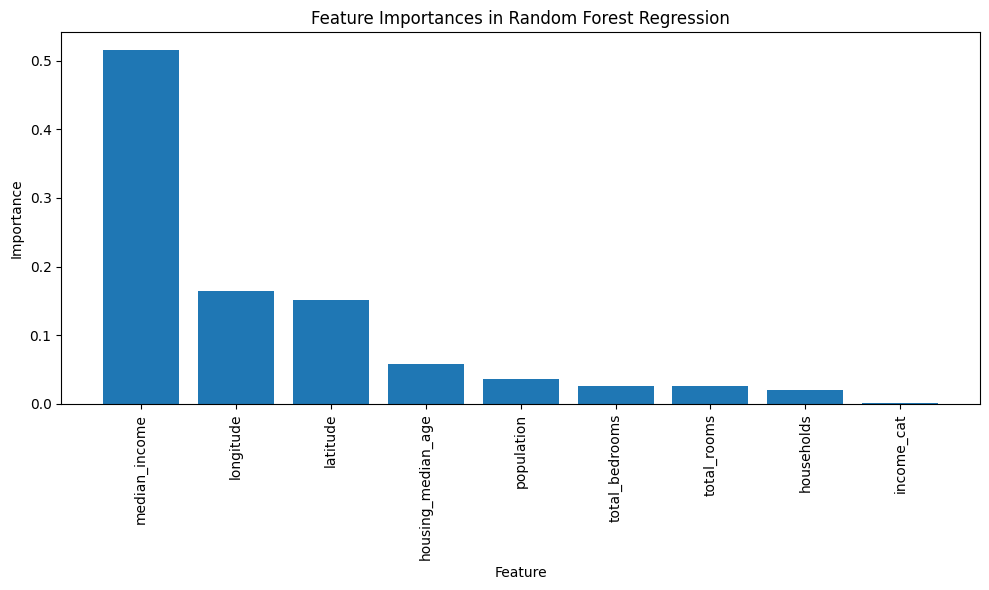

In [ ]:
import matplotlib.pyplot as plt

# Get feature importances from the trained model
feature_importances = rf_model.feature_importances_

# Create a DataFrame to store feature names and their importances
feature_importances_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort the features by importance in descending order
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(feature_importances_df['Feature'], feature_importances_df['Importance'])
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances in Random Forest Regression')
plt.tight_layout()
plt.show()


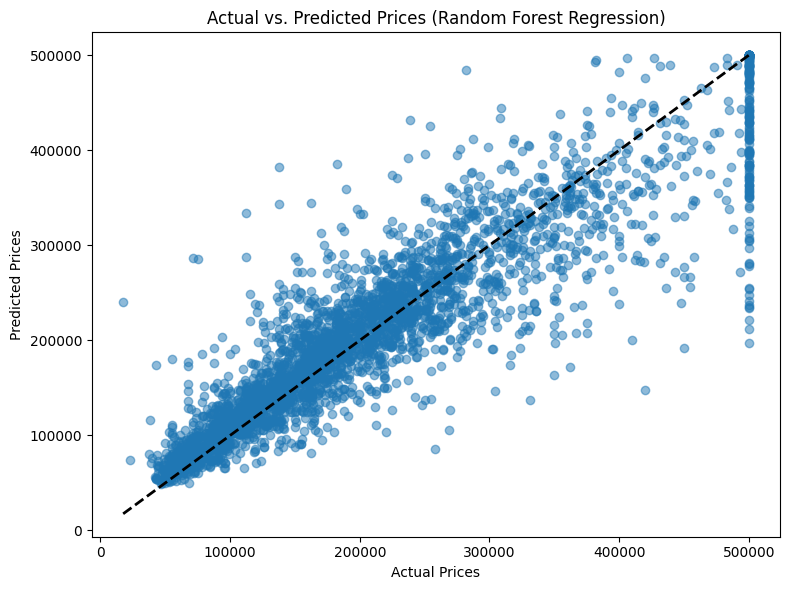

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Prices (Random Forest Regression)')
plt.tight_layout()
plt.show()


# **Classificação**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Classificadores
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
import xgboost as xgb

# Regressores
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Processamento e outros
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report # Métricas da classificação
from sklearn.metrics import mean_squared_error, r2_score # Métricas da regressão

# Ignorar os warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [ ]:
data = pd.read_csv(file_path)

In [ ]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Matriz de Correlação

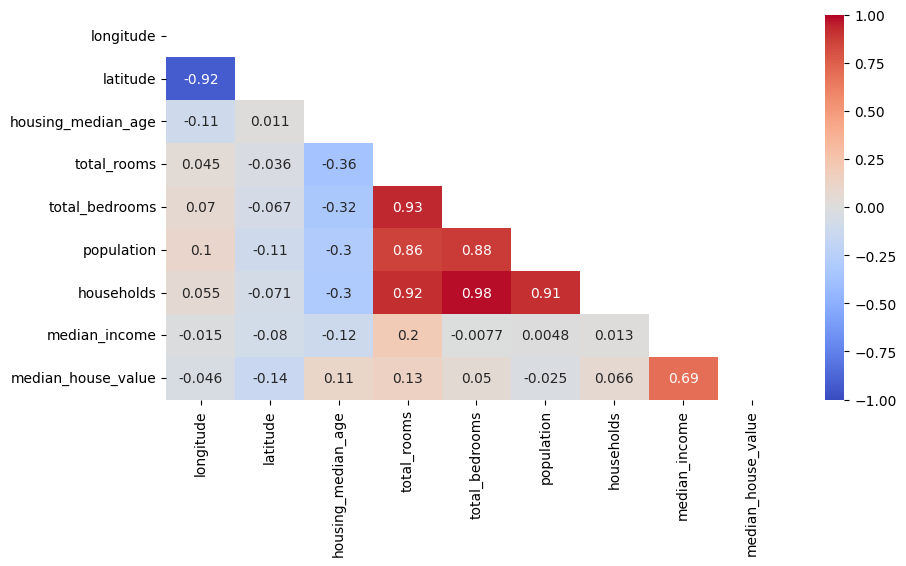

In [ ]:
plt.figure(figsize=(10, 5))

# Selecionar apenas as colunas que podem ser utilizadas na matriz de correlação
colunas = [col for col in data.columns if data[col].dtype != 'object']

# Calcular a matriz de correlação considerando apenas as colunas selecionadas
correlation_matrix = data[colunas].corr()

# Máscara para o triângulo superior
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Plotar a matriz de correlação
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1, mask=mask)

# Exibir o gráfico
plt.show()

### **Tratando e limpando os dados**

#### *Atributos faltantes*

Procurando por atributos faltantes

In [ ]:
data.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

Dropando tuplas com valores nulos em 'total_bedrooms'

In [ ]:
antes = data.shape[0]
data = data.dropna(subset=['total_bedrooms'], axis=0)
depois = data.shape[0]

print(f'Antes: {antes}\nDepois: {depois}')

Antes: 20640
Depois: 20433


#### *Tratando atributo categórico 'ocean_proximity'*

In [ ]:
data['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [ ]:
encode = {'NEAR BAY': 0, '<1H OCEAN': 1, 'INLAND': 2, 'NEAR OCEAN': 3, 'ISLAND': 4}

# Encoding da coluna ocean_proximity
data['ocean_proximity'] = data['ocean_proximity'].map(encode)
data['ocean_proximity'].value_counts()

1    9034
2    6496
3    2628
0    2270
4       5
Name: ocean_proximity, dtype: int64

### **Transformando os valores das casas em classes**

Para a tarefa de classificação são necessárias classes, que são os rótulos que queremos prever. No caso do nosso dataset, como possuímos valores contínuos que representam os valores das casas, vamos transformá-los em classes baseado em intervalos.

In [ ]:
minimo = data['median_house_value'].min()
maximo = data['median_house_value'].max()

# Cria os intervalos espaçados iguais
intervalos = np.linspace(minimo, maximo, 5)
rotulos = [0, 1, 2, 3]

data['median_house_value'] = pd.cut(data['median_house_value'], bins=intervalos, labels=rotulos, include_lowest=True)
data['median_house_value'].head()

0    3
1    2
2    2
3    2
4    2
Name: median_house_value, dtype: category
Categories (4, int64): [0 < 1 < 2 < 3]

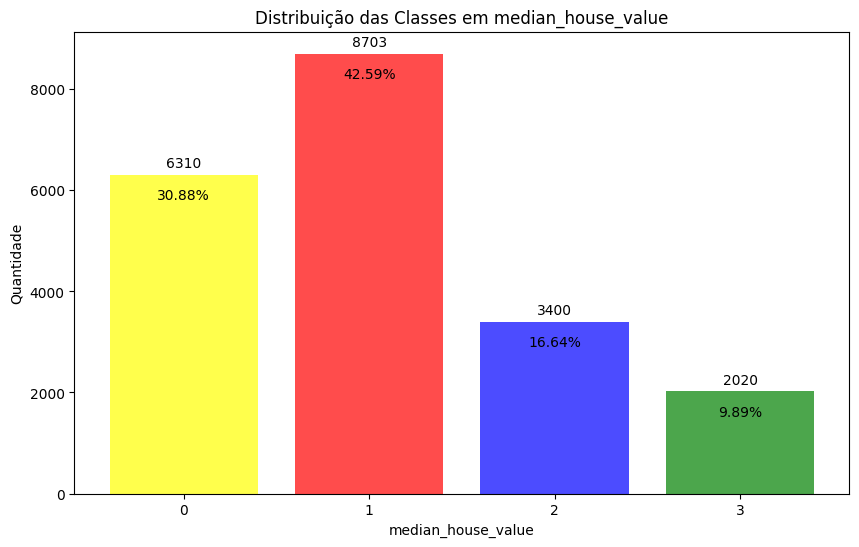

In [ ]:
def balanceamento(df, column_name):
    class_counts = df[column_name].value_counts()
    class_percentages = class_counts / class_counts.sum() * 100

    plt.figure(figsize=(10, 6))
    ax = plt.gca()

    colors = ['red', 'yellow', 'blue', 'green']
    bars = ax.bar(class_counts.index, class_counts.values, align='center', alpha=0.7, color=colors)

    for bar, count in zip(bars, class_counts.values):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', fontsize=10)

    for bar, percent in zip(bars, class_percentages.values):
        height = bar.get_height()
        ax.annotate(f'{percent:.2f}%', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, -15), textcoords="offset points", ha='center', va='center', fontsize=10)

    ax.set_xlabel(column_name)
    ax.set_ylabel('Quantidade')
    ax.set_title(f'Distribuição das Classes em {column_name}')
    plt.xticks(class_counts.index)

    plt.show()

balanceamento(data, 'median_house_value')

### **Preparando os dados para aplicar os modelos**

In [ ]:
# Separando o conjunto de dados em treino e teste
y = data['median_house_value']
x = data.drop('median_house_value', axis=1)

# 80% treino e 20% teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=16)

In [ ]:
# Aplicando o MinMaxScaler
scaler = MinMaxScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

#### *Aplicando os modelos no dados*

In [ ]:
def evaluate(model):
    # Treina
    model = model.fit(x_train, y_train)

    # Testa
    pred = model.predict(x_test)

    cm = confusion_matrix(y_test, pred)
    cmd = ConfusionMatrixDisplay(cm)
    fig, ax = plt.subplots(figsize=(4, 4))
    cmd.plot(ax=ax)
    plt.show()

    cr = classification_report(y_test, pred, digits=4, output_dict=True)
    print(classification_report(y_test, pred, digits=4))

    return cr

##### **Árvore de Decisão**

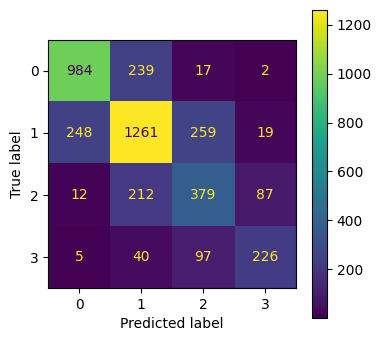

              precision    recall  f1-score   support

           0     0.7878    0.7923    0.7900      1242
           1     0.7197    0.7057    0.7126      1787
           2     0.5040    0.5493    0.5257       690
           3     0.6766    0.6141    0.6439       368

    accuracy                         0.6973      4087
   macro avg     0.6721    0.6653    0.6681      4087
weighted avg     0.7001    0.6973    0.6984      4087



In [ ]:
dt = DecisionTreeClassifier()

dt_report = evaluate(dt)

##### **Rede Neural**

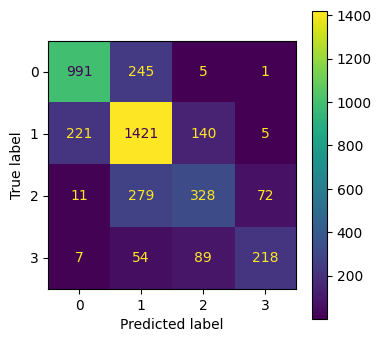

              precision    recall  f1-score   support

           0     0.8057    0.7979    0.8018      1242
           1     0.7109    0.7952    0.7507      1787
           2     0.5836    0.4754    0.5240       690
           3     0.7365    0.5924    0.6566       368

    accuracy                         0.7238      4087
   macro avg     0.7092    0.6652    0.6833      4087
weighted avg     0.7205    0.7238    0.7195      4087



In [ ]:
mlp = MLPClassifier()

mlp_report = evaluate(mlp)

##### **XGBoost**

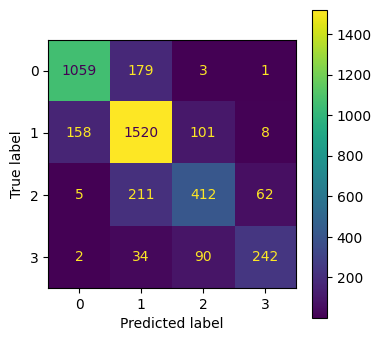

              precision    recall  f1-score   support

           0     0.8652    0.8527    0.8589      1242
           1     0.7819    0.8506    0.8148      1787
           2     0.6799    0.5971    0.6358       690
           3     0.7732    0.6576    0.7107       368

    accuracy                         0.7910      4087
   macro avg     0.7750    0.7395    0.7550      4087
weighted avg     0.7892    0.7910    0.7886      4087



In [ ]:
xgb = xgb.XGBClassifier()

xgb_report = evaluate(xgb)

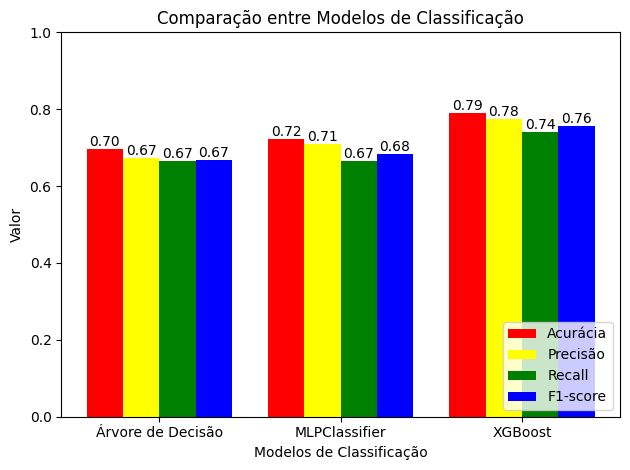

In [ ]:
modelos = ['Árvore de Decisão', 'MLPClassifier', 'XGBoost']

accuracy = [dt_report['accuracy'], mlp_report['accuracy'], xgb_report['accuracy']]
precision = [dt_report['macro avg']['precision'], mlp_report['macro avg']['precision'], xgb_report['macro avg']['precision']]
recall = [dt_report['macro avg']['recall'], mlp_report['macro avg']['recall'], xgb_report['macro avg']['recall']]
f1_score = [dt_report['macro avg']['f1-score'], mlp_report['macro avg']['f1-score'], xgb_report['macro avg']['f1-score']]

# Definir a largura das barras
bar_width = 0.2

# Calcular os deslocamentos para posicionar as barras lado a lado
x = np.arange(len(modelos))

# Plotar a barra para acurácia
plt.bar(x, accuracy, width=bar_width, label='Acurácia', align='center', color='red')

# Plotar as barras para precisão (deslocadas para a direita)
plt.bar(x + bar_width, precision, width=bar_width, label='Precisão', align='center', color='yellow')

# Plotar as barras para recall (deslocadas para a direita duas vezes a largura das barras)
plt.bar(x + 2*bar_width, recall, width=bar_width, label='Recall', align='center', color='green')

# Plotar as barras para F1-score (deslocadas para a direita três vezes a largura das barras)
plt.bar(x + 3*bar_width, f1_score, width=bar_width, label='F1-score', align='center', color='blue')

# Adicionar os valores acima de cada barra com 2 casas decimais
for i, j in zip([x, x + bar_width, x + 2*bar_width, x + 3*bar_width], [accuracy, precision, recall, f1_score]):
    for index, value in enumerate(j):
        plt.text(i[index], value, f'{value:.2f}', ha='center', va='bottom')

# Definir os rótulos do eixo x e o título do gráfico
plt.ylim(0, 1.0)
plt.xticks(x + 1.5*bar_width, modelos)  # Adicionar 1.5*bar_width para centralizar os rótulos
plt.xlabel('Modelos de Classificação')
plt.ylabel('Valor')
plt.title('Comparação entre Modelos de Classificação')

# Mover a legenda para a parte superior direita do gráfico
plt.legend(loc='lower right')

# Exibir o gráfico
plt.tight_layout()
plt.show()